# QOSF - TASK 4
# Variational Quantum Eigensolver

The goal of this task is to determine the lowest eigenvalue of the following unitary matrix.

$$
U = 
\begin{bmatrix}
0 & 0 & 0 & 1 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
1 & 0 & 0 & 0
\end{bmatrix}
$$

This will be done using VQE-like circuits. To achieve this, it is necessary to express the unitary $U$ as a combination of Pauli operators ${\mathbb{1}, X, Y, Z}$.

$$
\mathbb{1} =
\begin{bmatrix}
1 & 0  \\
0 & 1
\end{bmatrix}\quad
X =
\begin{bmatrix}
0 & 1 \\
1& 0
\end{bmatrix}\quad
Y =
\begin{bmatrix}
0 & -i \\
i & 0
\end{bmatrix}\quad
Z =
\begin{bmatrix}
1 & 0 \\
0 & -1
\end{bmatrix}
$$


This decomposition is required to implement $U$ on a quantum computer. Since we are working with a $4\times4$ matrix, two qubits are needed, so the target decomposition consists of tensor products of two Pauli operators (for example $X_1 \otimes Y_2$, where the subscript specifies the qubit on which the operator acts).


### Decomposition in terms of Pauli operators

Since

$$
X_1\otimes X_2 = 
\begin{bmatrix} 0 & 1\\ 1 & 0 \end{bmatrix} \otimes \begin{bmatrix} 0 & 1\\ 1 & 0 \end{bmatrix} =
\begin{bmatrix} 0 \cdot \begin{bmatrix} 0 & 1\\ 1 & 0 \end{bmatrix} & 1 \cdot \begin{bmatrix} 0 & 1\\ 1 & 0 \end{bmatrix}\\ 1 \cdot \begin{bmatrix} 0 & 1\\ 1 & 0 \end{bmatrix} & 0 \cdot \begin{bmatrix} 0 & 1\\ 1 & 0 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} 0 &  0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 1 & 0 & 0 & 0 \end{bmatrix}
$$

$$
Y_1\otimes Y_2 = 
\begin{bmatrix} 0 & -i\\ i & 0 \end{bmatrix} \otimes \begin{bmatrix} 0 & -i\\ i & 0 \end{bmatrix} = \begin{bmatrix} 0 &  0 & 0 & -1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ -1 & 0 & 0 & 0 \end{bmatrix}
$$

$$
Z_1\otimes Z_2 = 
\begin{bmatrix} 1 & 0\\ 0 & -1 \end{bmatrix} \otimes \begin{bmatrix} 1 & 0\\ 0 & -1 \end{bmatrix} = \begin{bmatrix} 1 &  0 & 0 & 0 \\ 0 & -1 & 0 & 0 \\ 0 & 0 & -1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}
$$

$$
\mathbb{1}_{4\times4} = \begin{bmatrix} 1 &  0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}
$$

We can see that: 

$$
U = \frac{1}{2}\big(I_1\otimes I_2\big) + \frac{1}{2}\big(X_1 \otimes X_2\big) - \frac{1}{2}\big(Y_1\otimes Y_2\big) - \frac{1}{2}\big(Z_1\otimes Z_2\big)
$$

In other words, this gives the required decomposition of the matrix $U$ in terms of Pauli operators. In VQE algorithms, one typically works by minimizing the energy of a system, so from this point on the unitary matrix will be referred to as the Hamiltonian $\mathcal{H} = U$ of the system, and the energy as its expectation value on a given state $|\psi(\theta)\rangle$, namely $E(\theta) = \langle \mathcal{H} \rangle_{\theta} = \langle \psi(\theta) | \mathcal{H} | \psi(\theta)\rangle$.

Observe that if $|\psi(\theta)\rangle$ is an eigenvector of the unitary $\mathcal{H}$, its energy $E(\theta)$ coincides with the corresponding eigenvalue. The objective is therefore to determine the lowest eigenvalue of $\mathcal{H}$ by minimizing $\langle \mathcal{H} \rangle \rightarrow \langle \mathcal{H} \rangle_{|\psi(\theta_{min})\rangle}$. The challenging aspect is to choose a trial state that admits a good parametrization (there is no guarantee that, by varying $\theta$, the eigenvector associated with the smallest eigenvalue can actually be reached).

### Variational Quantum Eigensolver

The core idea of VQE is to use a quantum computer to evaluate the expectation value of the Hamiltonian on a trial state $|\psi(\theta)\rangle$ parameterized by $\theta$, and then gradually vary this parameter in order to obtain smaller and smaller values of the energy $E(\theta)$.

Since $\langle I_1 \otimes I_2 \rangle = 1$, one obtains (from now on the $\otimes$ symbol is omitted for readability)

$$
\langle \mathcal{H} \rangle 
= \frac{1}{2}\big(1 + \langle X_1 X_2\rangle - \langle Y_1 Y_2\rangle - \langle Z_1 Z_2\rangle\big) \\
$$  

This implies that suitable quantum circuits must be used to estimate the expectation values of the operators $X_1 X_2,\ Y_1 Y_2,\ Z_1 Z_2$, and then these contributions are combined to recover the eigenvalue $E = \langle \mathcal{H} \rangle$.

On current quantum devices, measurements are typically performed in the $Z$ basis (the computational basis), which means that one directly accesses eigenvectors and eigenvalues of $Z$. To measure different observables, a basis change is required, implemented by adding appropriate gates just before the measurement.

### Change of basis

Observing that:
$$
X=HZH\quad Y=(HS^\dagger)^\dagger Z(HS^\dagger)
$$
it is possible to measure in the $X$ basis by inserting a Hadamard gate $H$ before the measurement. An analogous procedure holds for $Y$, using the combination of Hadamard and phase gates $HS^\dagger$.

In our setting, however, the goal is to measure two-qubit observables.

#### Observable $Z_1 Z_2$
  
The operator $Z_1 Z_2$ acts as follows: 
$$
Z_1 Z_2|00\rangle = +1 |00\rangle \\
Z_1 Z_2|11\rangle = +1 |11\rangle \\
Z_1 Z_2|01\rangle = -1 |01\rangle \\
Z_1 Z_2|10\rangle = -1 |10\rangle \\
$$
In other words, it checks whether the two qubits are in the same state (both $0$ or both $1$), in which case the eigenvalue is $1$, and if they are different the eigenvalue is $-1$. A similar behaviour can be reproduced using a CNOT gate, since this gate writes on the second qubit the binary sum of the two inputs, $\text{CNOT}|q_1\rangle|q_2\rangle = |q_1\rangle|q_1 \oplus q_2\rangle$.
It is important to note that the numerical outcomes (eigenvalues) coincide, but the final states obtained via the CNOT differ from those produced directly by $Z_1 Z_2$.
Indeed, if
* $q_1 = q_2$ (the two qubits are equal), then $|q_1 \oplus q_2\rangle = |0\rangle$ and measuring the second qubit in the computational ($Z$) basis yields the result $+1$,
* $q_1 \neq q_2$, then $|q_1 \oplus q_2\rangle = |1\rangle$ and a measurement yields $-1$, as required.

> Recall that for a general qubit $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$, one has $\langle Z \rangle = \langle \psi | Z | \psi \rangle = |\alpha|^2 - |\beta|^2$.

Thus, the observable $Z_1 Z_2$ can be accessed by inserting a CNOT gate and then measuring only the second qubit in the standard $Z$ basis. Measuring whether this qubit is in state $|0\rangle$ or $|1\rangle$ gives a direct bijection with the possible outcomes of $Z_1 Z_2$, namely $+1$ or $-1$, respectively. The corresponding circuit is shown below.

Measurement in the ZZ basis


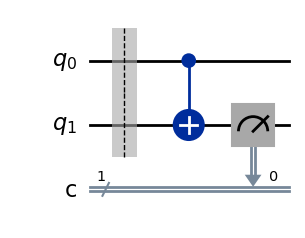

In [1]:
import qiskit as qk
import numpy as np

qc = qk.QuantumCircuit(2,1)
qc.barrier()
qc.cx(0,1)
qc.measure(1,0) #qubit 1 to cbit 0
print("Measurement in the ZZ basis")
# qc.draw(output="mpl",style="clifford")
qc.draw(output="mpl")



Other two-qubit observables can be reduced to a measurement of $Z_1 Z_2$ by applying suitable unitary transformations (i.e., performing an appropriate change of basis).

#### Observable $X_1 X_2$

Using the relation $X = H Z H$ together with the CNOT-based measurement of $Z_1 Z_2$, the observable $X_1 X_2$ can be measured by employing the following circuit:

Measurement in the XX basis


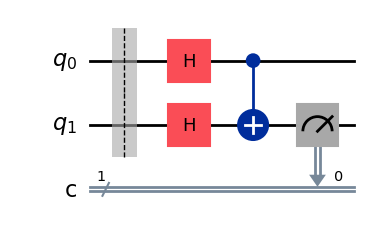

In [2]:
qc = qk.QuantumCircuit(2,1)
qc.barrier()
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.measure(1,0)
print("Measurement in the XX basis")
qc.draw(output="mpl")

#### Observable $Y_1 Y_2$

Using the identity $Y = (HS^\dagger)^\dagger Z (HS^\dagger)$ together with the CNOT-based measurement of $Z_1 Z_2$, the observable $Y_1 Y_2$ can be measured by means of the following circuit:

Measurement in the YY basis


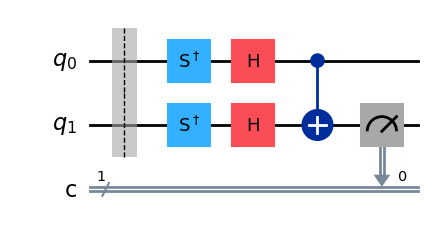

In [3]:
qc = qk.QuantumCircuit(2,1)
qc.barrier()
qc.sdg(0)
qc.sdg(1)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.measure(1,0)
print("Measurement in the YY basis")
qc.draw(output="mpl")

## VQE

The next step is to implement the VQE architecture, which operates as follows:
* select an ansatz for a trial state $|\psi(\theta)\rangle$, parameterized by a real parameter $\theta$
* employ three separate quantum circuits to estimate the expectation values $\langle X_1 X_2 \rangle_\theta$, $\langle Y_1 Y_2 \rangle_\theta$ and $\langle Z_1 Z_2 \rangle_\theta$ on the same underlying trial state, where the subscript emphasizes the dependence on $\theta$ 
* evaluate the energy $E(\theta) = \langle \mathcal{H} \rangle_\theta$
* update $\theta$ so as to obtain a smaller energy

Following this prescription, the chosen ansatz is:
$$
|\psi(\theta_1, \theta_2)\rangle
=
\big[\text{CNOT}_{1,2}\,(R_Y(\theta_1)_1 \otimes R_Y(\theta_2)_2)\big]\,|00\rangle
$$

All quantum circuits are implemented using **Qiskit**.

Ansatz initial state, with thetas: 1.3, 0.6


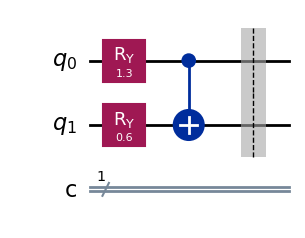

In [4]:
qc = qk.QuantumCircuit(2, 1)

theta1 = 1.3
theta2 = 0.6

# Independent rotations to set the initial state
qc.ry(theta1, 0)
qc.ry(theta2, 1)
qc.cx(0,1)

qc.barrier()
print(f"Ansatz initial state, with thetas: {theta1}, {theta2}")
qc.draw(output="mpl")



###### Importation of packages

In [5]:
import qiskit_aer
import numpy as np
from scipy.optimize import minimize_scalar, minimize
from numpy import pi

sim_bknd = qiskit_aer.Aer.get_backend('qasm_simulator')

###### Functions declaration

In [6]:
sim_bknd = qiskit_aer.Aer.get_backend('qasm_simulator')


def ansatz(qc, qr, params):
    """
    Ansatz using 2 angles to control qubits independently before entanglement.
    params: list of floats, e.g., [theta_0, theta_1]
    """
    theta0 = params[0]
    theta1 = params[1]
    
    # Independent rotations to set the initial state
    qc.ry(theta0, qr[0])
    qc.ry(theta1, qr[1])
    
    # Entangler
    qc.cx(qr[0], qr[1])
    
    return qc


def measurements(qc, qr, cr, op):
    """
    Applies the necessary rotations to measure in XX, YY, or ZZ basis.
    """
    if op == "XX":
        # Change of basis, since X = H Z H
        qc.h(qr[0])
        qc.h(qr[1])
        
        # CNOT used to measure the ZZ operator
        qc.cx(qr[0], qr[1])
        
        # Measurement of qubit 1 into classical bit 0
        qc.measure(qr[1], cr[0])     
    
    elif op == "YY":
        # Change of basis, since Y = (H S†) Z (H S†)
        qc.sdg(qr[0])
        qc.sdg(qr[1])
        qc.h(qr[0])
        qc.h(qr[1])
        
        # CNOT used to measure the ZZ operator
        qc.cx(qr[0], qr[1])
        
        # Measurement of qubit 1 into classical bit 0
        qc.measure(qr[1], cr[0])
        
    elif op == "ZZ":
        # CNOT used to measure the ZZ operator
        qc.cx(qr[0], qr[1])
        
        # Measurement of qubit 1 into classical bit 0
        qc.measure(qr[1], cr[0])
    
    else:
        print(f"WARNING: measurement in the {op} basis is not supported")
        return qc
        
    return qc


def hamiltonian(params):
    """
    Evaluates the energy of the trial state using the mean values of XX, YY and ZZ.
    
    Arguments
    ----------
    params : dict
        Dictionary containing the expectation values of XX, YY and ZZ:
        params = {'XX': ..., 'YY': ..., 'ZZ': ...}.
    
    Returns
    -------
    float
        Energy of the system.
    """
    # Apply the Hamiltonian H = 1/2 * (Id + XX - YY - ZZ)
    en = (4*1 + 2*params['XX'] - 5*params['YY']- params['ZZ'] ) / 2
    return en


def vqe_step(params, verbose=False):
    """
    Main VQE Loop using 2 parameters.
    """
    shots = 1024
    vqe_res = {}   # {'XX': val, 'YY': val, 'ZZ': val}
    qc_list = {}   # {'XX': qc,  'YY': qc,  'ZZ': qc}

    # We need to run 3 separate circuits: one for XX, one for YY, one for ZZ
    for op in ["XX", "YY", "ZZ"]:
        qr = qk.QuantumRegister(2, "qr")
        cr = qk.ClassicalRegister(1, "cr") # Note: Measuring BOTH qubits
        qc = qk.QuantumCircuit(qr, cr)

        # 1. Build Ansatz with current params
        qc = ansatz(qc, qr, params)
        qc.barrier()
        
        # 2. Add Measurement Gates
        qc = measurements(qc, qr, cr, op)

        # 3. Transpile and Run (Your original method)
        qc_t = qk.transpile(qc, sim_bknd)
        job = sim_bknd.run(qc_t, shots=shots)
        counts = job.result().get_counts()

        # counts['0'] is the number of zeros measured
        # counts['1'] is the number of ones measured
        
        # Evaluate the mean value of Z from the counts
        if len(counts) == 1:
            # All results are identical
            expectation_values = 1 if '0' in counts else -1
        else:
            # Mean value of Z from the difference between zeros and ones
            # 0 in the classical bit -> eigenvalue +1
            # 1 in the classical bit -> eigenvalue -1
            expectation_values = (counts['0'] - counts['1']) / shots      # values for "XX", "YY" and "ZZ"
        vqe_res[op] = expectation_values
        qc_list[op] = qc

    # 5. Calculate Energy
    energy = hamiltonian(vqe_res)
    
    if verbose:
        print("Mean values from measurement results:\n", vqe_res)
        print()
        print(f"{'Theta 0':>12} {'Theta 1':>12} {'Energy':>12} {'<XX>':>12} {'<YY>':>12} {'<ZZ>':>12}")
        print(f"{params[0]:>12.6f} {params[1]:>12.6f} {energy:>12.6f} "
                f"{vqe_res['XX']:>12.6f} {vqe_res['YY']:>12.6f} {vqe_res['ZZ']:>12.6f}")
        return energy, qc_list

    return energy

Let us now verify that the whole procedure works correctly.

Mean values from measurement results:
 {'XX': -0.61328125, 'YY': -0.228515625, 'ZZ': -0.390625}

     Theta 0      Theta 1       Energy         <XX>         <YY>         <ZZ>
   -2.500000     2.000000     2.153320    -0.613281    -0.228516    -0.390625

 Example of the quantum circuit for the measurement of YY


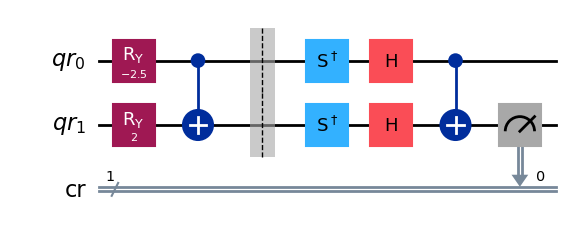

In [7]:
# Set the value of theta
params = [-2.5,2]
energy, qc_list = vqe_step(params, verbose = True)
# Plot the circuit used for the measurement of YY
op_example = 'YY'
print(f"\n Example of the quantum circuit for the measurement of {op_example}")
qc_list[op_example].draw(output="mpl")

We see that for $\theta=1.2$, the energy $E(1.2)=\langle\mathcal{H}\rangle_{1.2} \approx 0.6253$, with measured expectation values 
$\langle X_1 X_2 \rangle_{1.2} \approx 1.0$, $\langle Y_1 Y_2 \rangle_{1.2} \approx -0.3834$ and $\langle Z_1 Z_2 \rangle_{1.2} \approx 0.3660$.  
Our aim is to find a value for the parameter that yields the lowest possible energy, and that is the desired lowest eigenvalue for the Task.  
The minimization procedure can be done by hand, or by setting up an optimizer. 

##### Using an optimizer

In [8]:
# Initial guess (2 angles)
initial_params = [0.0, 1.0]

print("Starting VQE Optimization...")
res = minimize(
    vqe_step, 
    initial_params, method='COBYLA', options={'maxiter': 100})
print(res)

print("\nOptimization Complete!")
print(f"Optimal Angles: {res.x}")
print(f"Minimum Energy: {res.fun:.4f}") 

Starting VQE Optimization...


 message: Return from COBYLA because the trust region radius reaches its lower bound.
 success: True
  status: 0
     fun: -2.0
       x: [-1.542e+00 -1.714e-02]
    nfev: 31
   maxcv: 0.0

Optimization Complete!
Optimal Angles: [-1.54236405 -0.01714247]
Minimum Energy: -2.0000


##### Conclusion
The optimizer successfully converges to a solution. More precisely, it identifies an optimal value around $\theta \approx 0.0101$, for which the corresponding energy is $E(\theta) \approx 0.0$.
This result can be verified explicitly by passing $\theta = 0.0101$ (or the value returned by the optimizer) to the vqe_step function.

In [9]:
lowest, qc_list = vqe_step(res.x, verbose=True)
print(lowest)

Mean values from measurement results:
 {'XX': -1, 'YY': 0.998046875, 'ZZ': 1}

     Theta 0      Theta 1       Energy         <XX>         <YY>         <ZZ>
   -1.542364    -0.017142    -1.995117    -1.000000     0.998047     1.000000
-1.9951171875


And we can directly confirm that the target result is obtained as:

$$
\langle \mathcal{H} \rangle_{\theta = 0.0101} 
= \frac{1}{2}\big(1  + \langle X X\rangle - \langle Y Y\rangle - \langle Z Z\rangle \big) \approx \\ 
\approx \frac{1}{2}\big(1 + (-1) - (1) - (1)\big) = -1
$$  

with $\langle XX \rangle \approx -1$, $\langle YY \rangle \approx 1$, $\langle ZZ \rangle \approx 1$.  

**Therefore, the Task is solved: the lowest eigenvalue of $\mathcal{H}$ (i.e., of $U$) is found to be $0$.**

###### Final (classical) check
As a final step, the outcome of our calculation can be validated using SciPy’s eigensolver.

In [10]:
#This matrix coincides with $U$. We now proceed to compute its eigenvalues.# Definition of one qubit Pauli matrices
I = np.array([[1,0],[0,1]])
X = np.array([[0,1],[1,0]])
Y = np.array([[0,-1j],[1j,0]])
Z = np.array([[1,0],[0,-1]])

# Evaluation of two qubit Pauli matrices
II = np.kron(I, I)
XX = np.kron(X, X)
YY = np.kron(Y, Y)
ZZ = np.kron(Z, Z)

# Calculation of the Hamiltonian corresponding to the new U
H = 0.5 * (4*II + 2*XX - 5*YY - ZZ)

print("Desired Hamiltonian H = \n", H)

Desired Hamiltonian H = 
 [[ 1.5+0.j  0. +0.j  0. +0.j  3.5+0.j]
 [ 0. +0.j  2.5+0.j -1.5+0.j  0. +0.j]
 [ 0. +0.j -1.5+0.j  2.5+0.j  0. +0.j]
 [ 3.5+0.j  0. +0.j  0. +0.j  1.5+0.j]]


This matrix coincides with $U$. We now proceed to compute its eigenvalues.

In [11]:
import scipy

# Calculate eigenvalues and eigenvectors of H
eigenvalues, eigenvectors = scipy.linalg.eig(H)
print("Eigenvalues:", eigenvalues)

Eigenvalues: [ 5.+0.j -2.+0.j  4.+0.j  1.+0.j]


$-1$ does appears as the smallest eigenvalue, in agreement with the value obtained using VQE.